In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Cargar dataset
df = pd.read_csv('path_to_your_modified_csv.csv', encoding="utf-8")


#analisis de datos
df.info()

#df = df.drop('length', axis=1) 



df_isnull = df.isnull()
total_null_values = df_isnull.sum().sum()
print("num de nulos",total_null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       1252 non-null   object
 1   Clean_Resume   1252 non-null   object
 2   Common Skills  1252 non-null   object
dtypes: object(3)
memory usage: 29.5+ KB
num de nulos 0


In [3]:
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)
#elimne nulos

Empty DataFrame
Columns: [Category, Clean_Resume, Common Skills]
Index: []


In [4]:
# Seleccionar la columna
columna = df["Clean_Resume"]

print(columna) 

# Contar valores únicos 
jobTitle_valores_unicos = columna.unique().shape[0]



# Imprimir el resultado 
print(f"Número de valores únicos en la columna 'Resume': {jobTitle_valores_unicos}")



0       key programing language c c python apex visual...
1       key programing language c c python apex visual...
2       key programing language c c python apex visual...
3       key programing language c c python apex visual...
4       bitcoin ethereum solidity hyperledger beginner...
                              ...                        
1247    web designing focused ux ui design certified w...
1248    sc information technology mumbai university mu...
1249    technical skill web technology angular j html5...
1250    c bachelor application university h c universi...
1251    sc information technology mumbai university mu...
Name: Clean_Resume, Length: 1252, dtype: object
Número de valores únicos en la columna 'Resume': 639


In [5]:
df['length Resume'] = df['Clean_Resume'].str.len()
df['length Resume'].describe()



count     1252.000000
mean      1990.984824
std       2337.381571
min         93.000000
25%        221.750000
50%       1438.000000
75%       2745.000000
max      19135.000000
Name: length Resume, dtype: float64

In [6]:
df['length Skills'] = df['Common Skills'].str.len()
df['length Skills'].describe()

count    1252.000000
mean      167.830671
std        76.600921
min        14.000000
25%       167.000000
50%       186.000000
75%       219.000000
max       286.000000
Name: length Skills, dtype: float64

C:\Users\pepeh\AppData\Local\Temp\ipykernel_19280\3186742145.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length Resume']).set_title('cleaned_Resume length distribution')


Text(0.5, 1.0, 'cleaned_Resume length distribution')

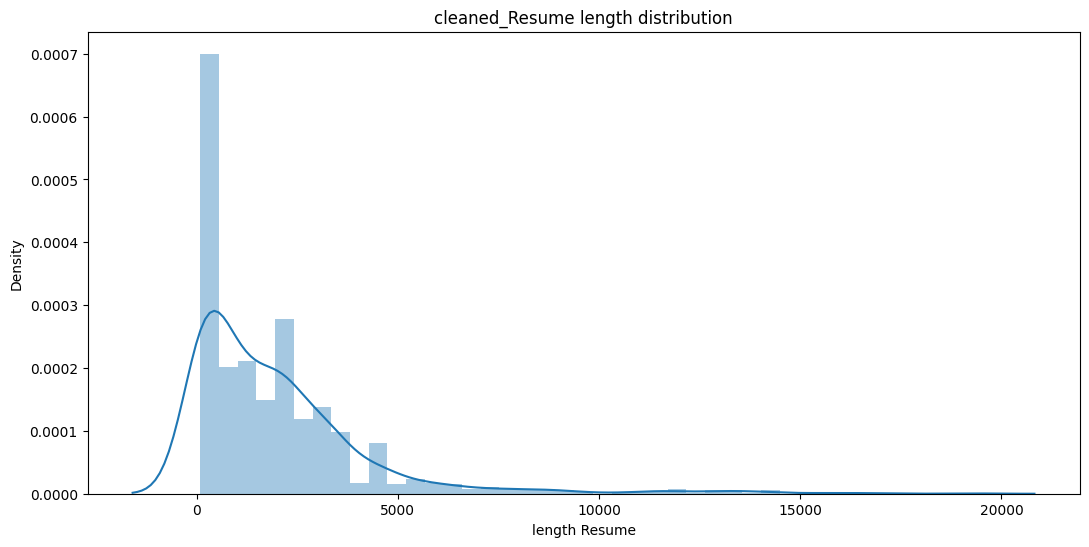

In [7]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length Resume']).set_title('cleaned_Resume length distribution')

In [8]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length Responsabilities']).set_title('Responsabilities length distribution')

KeyError: 'length Responsabilities'

<Figure size 1280x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['length skills']).set_title('skills length distribution')

NameError: name 'data' is not defined

<Figure size 1280x600 with 0 Axes>

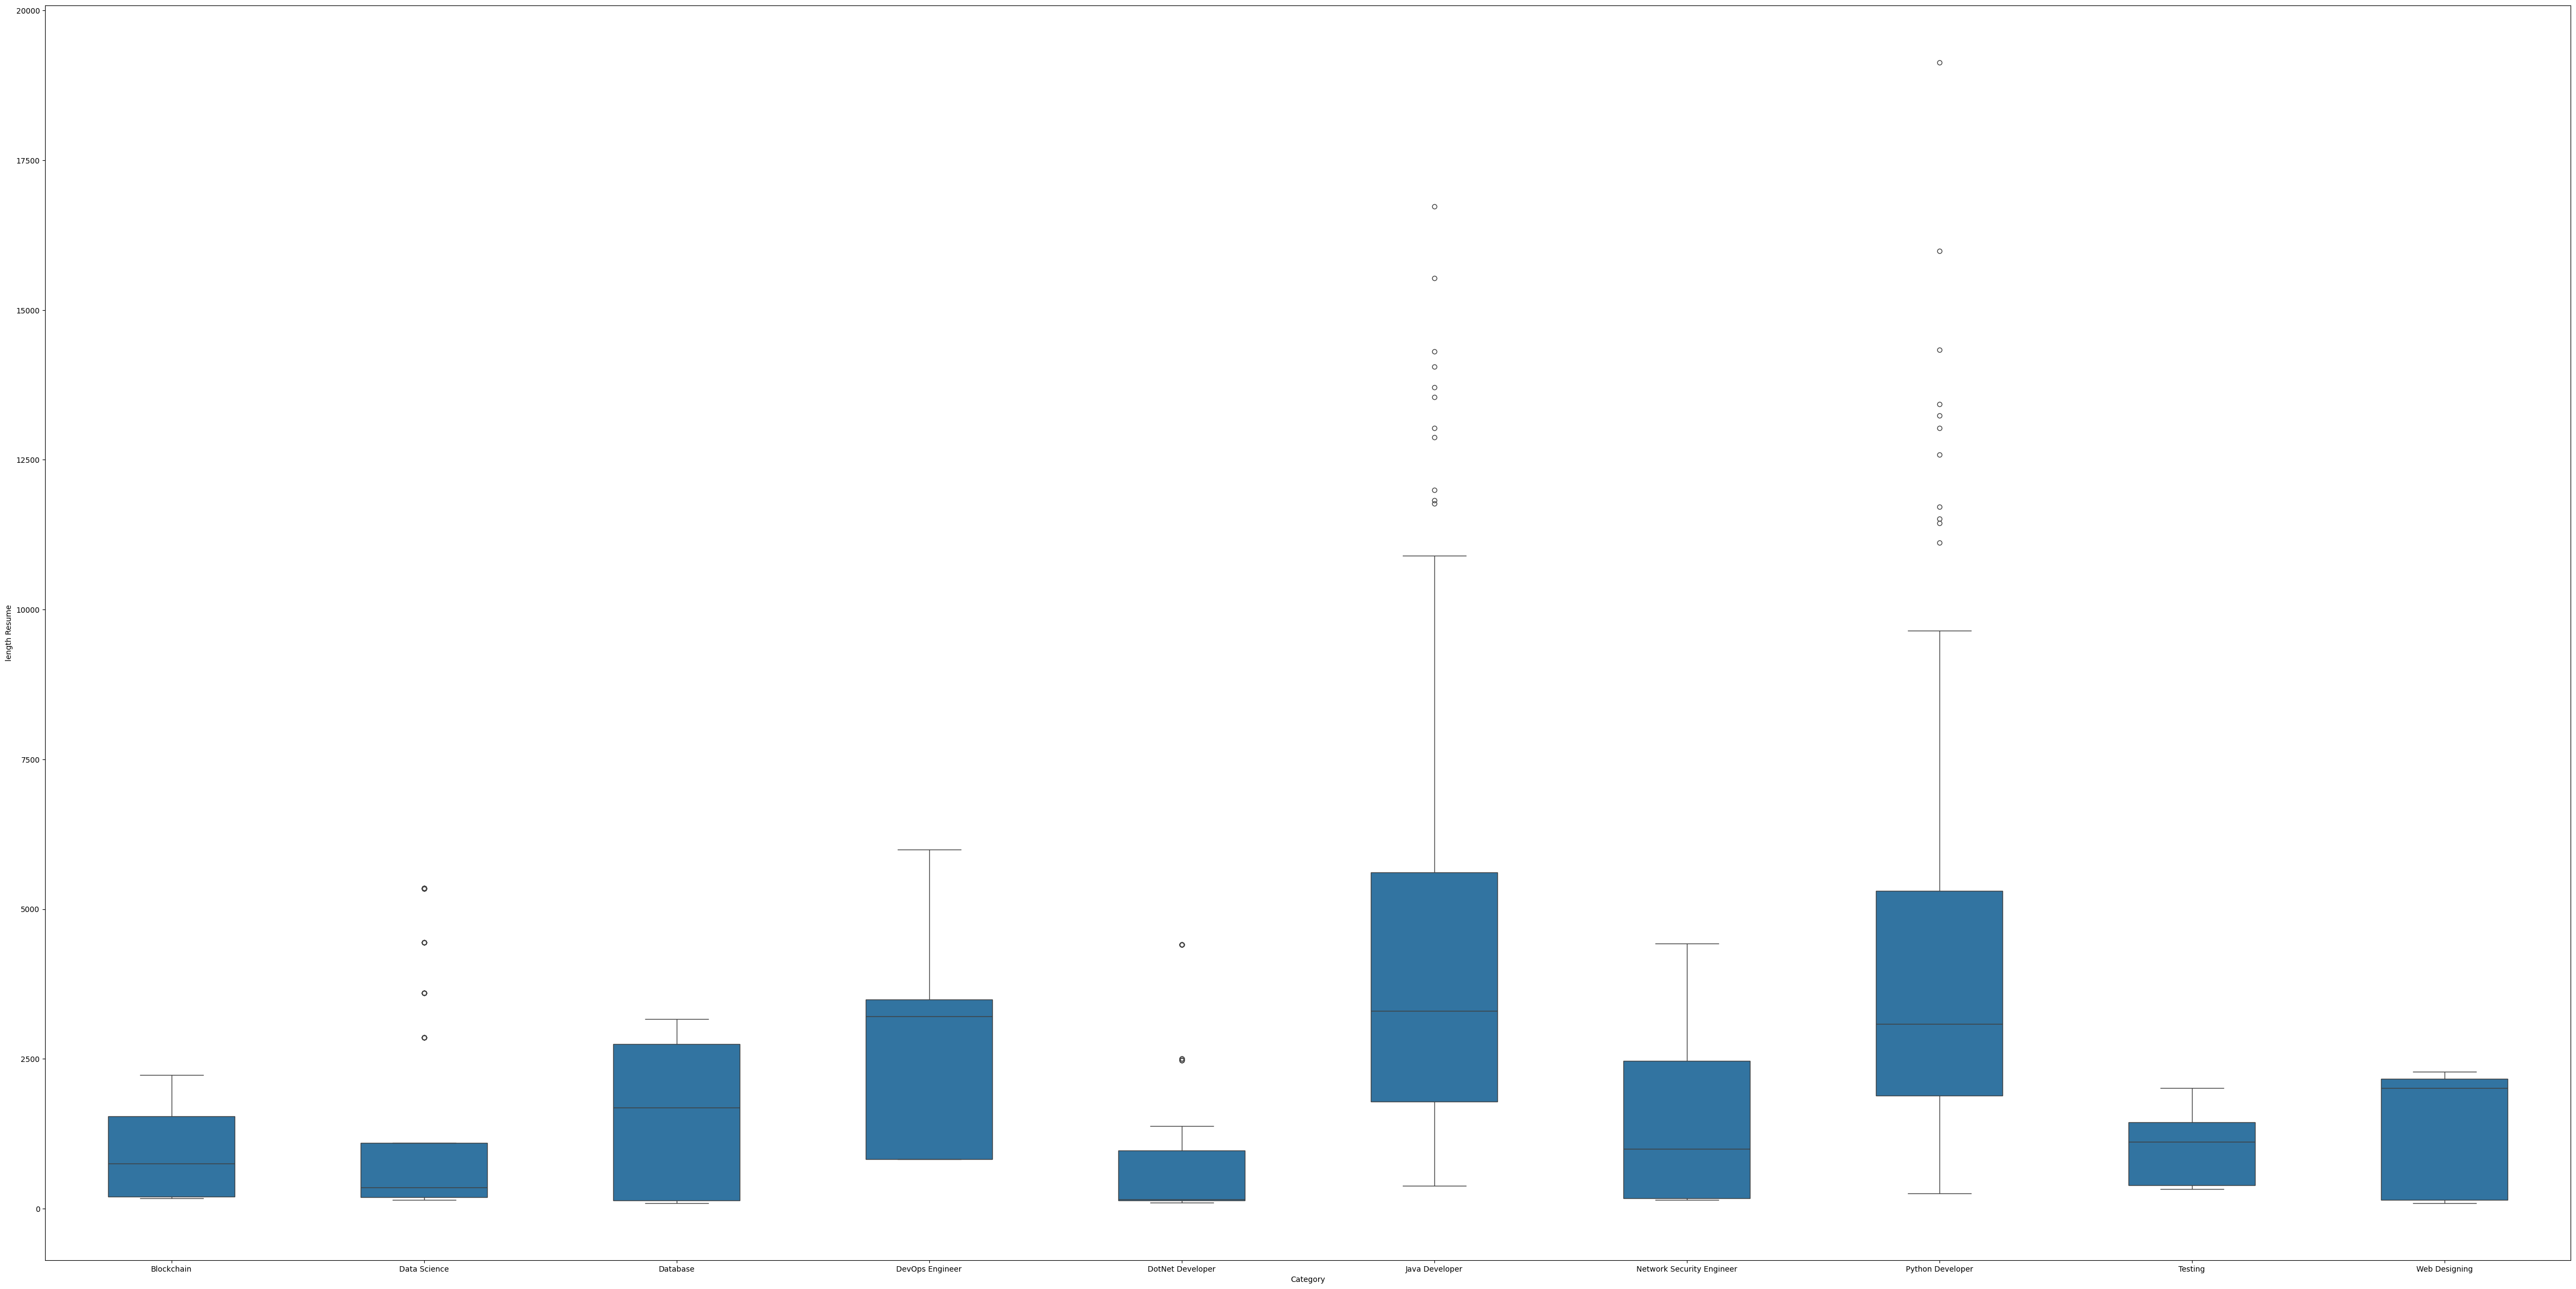

In [9]:
plt.figure(figsize=(60,30))
sns.boxplot(data=df, x='Category', y='length Resume', width=.5);

In [10]:
df['Category'].value_counts()

Category
Java Developer               140
Python Developer             140
Testing                      140
Web Designing                140
Blockchain                   130
Data Science                 130
Database                     116
DevOps Engineer              110
DotNet Developer             106
Network Security Engineer    100
Name: count, dtype: int64

C:\Users\pepeh\AppData\Local\Temp\ipykernel_19280\2955146718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=df, palette='Reds')


<Axes: xlabel='count', ylabel='Category'>

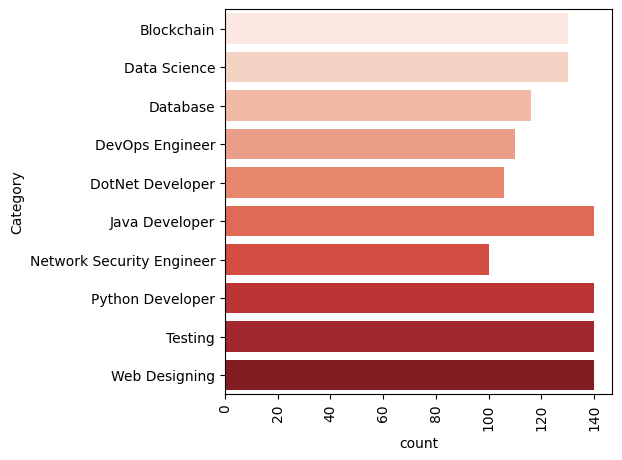

In [11]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [12]:

df['Category'].value_counts()[:3].index
numero_textos_unicos = df['Clean_Resume'].nunique()

# Imprimir el número de textos únicos
print(f"Número de textos únicos: {numero_textos_unicos}")

Número de textos únicos: 639


In [13]:
labels = [
    "Data Science",
    "HR",
    "Advocate",
    "Arts",
    "Web Designing",
    "Mechanical Engineering",
    "Sales",
    "Health and fitness",
    "Civil Engineer",
    "Java Developer",
    "Business Analyst",
    "SAP Developer",
    "Automation Testing",
    "Electrical Engineering",
    "Operations Manager",
    "Python Developer",
    "DevOps Engineer",
    "Network Security Engineer",
    "PMO",
    "Database",
    "Hadoop",
    "ETL Developer",
    "DotNet Developer",
    "Blockchain",
    "Testing"
]

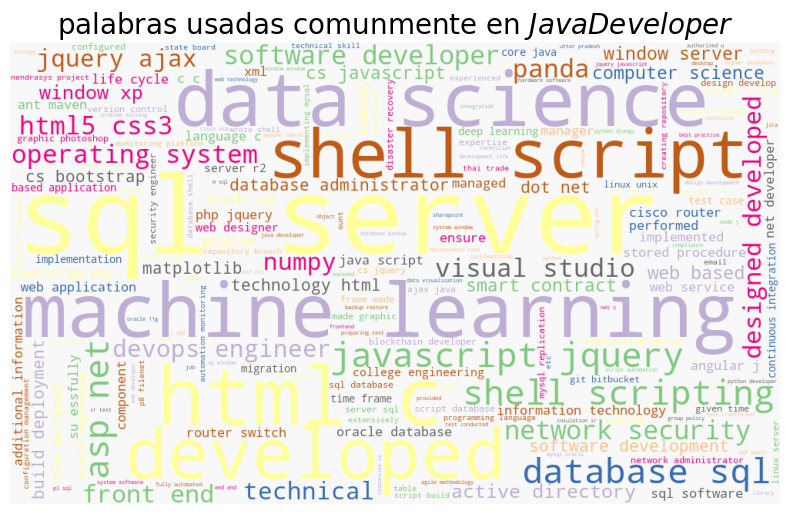

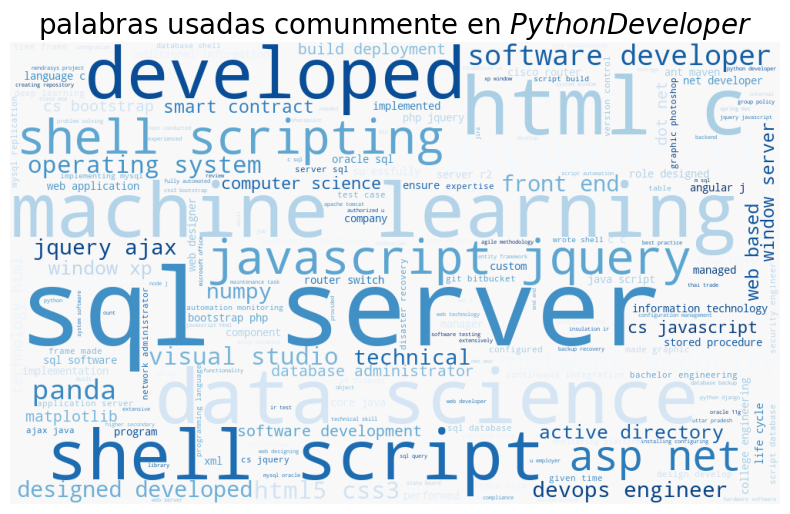

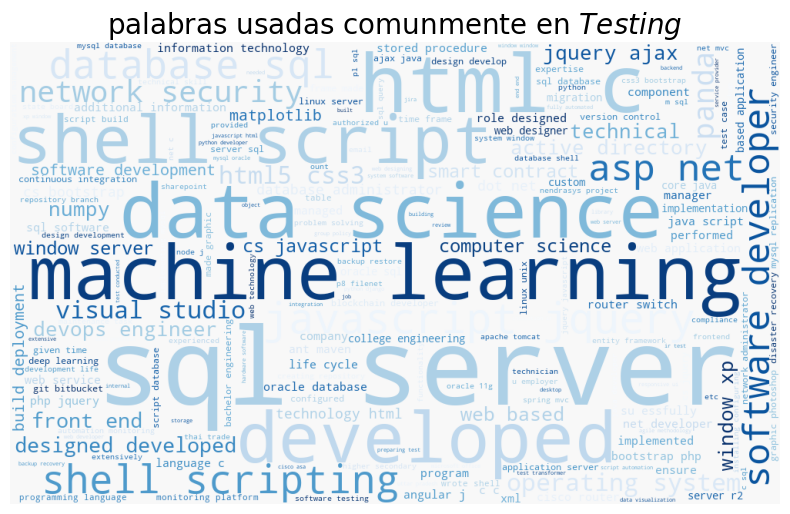

In [14]:


a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["Clean_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ ", size=20)
    plt.show()

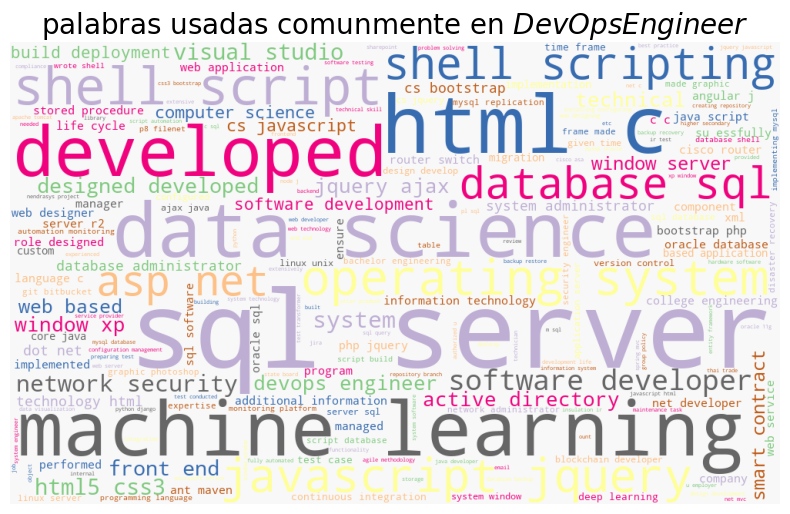

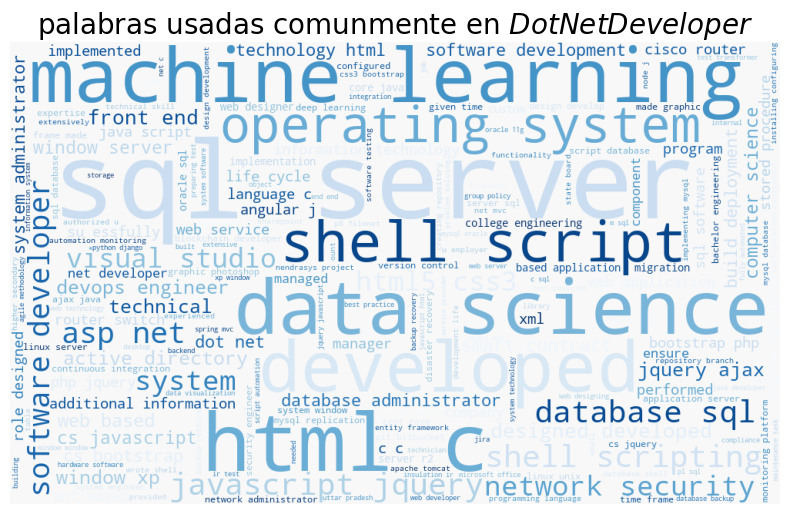

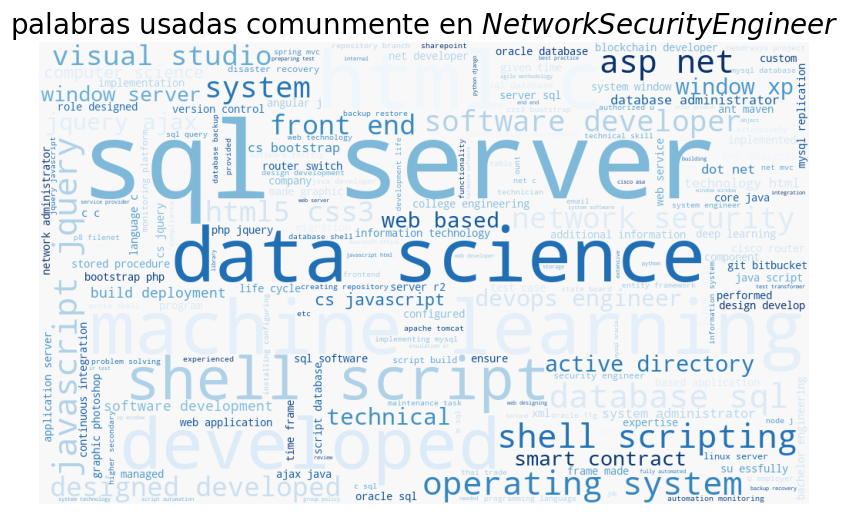

In [ ]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["Clean_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$", size=20)
    plt.show()

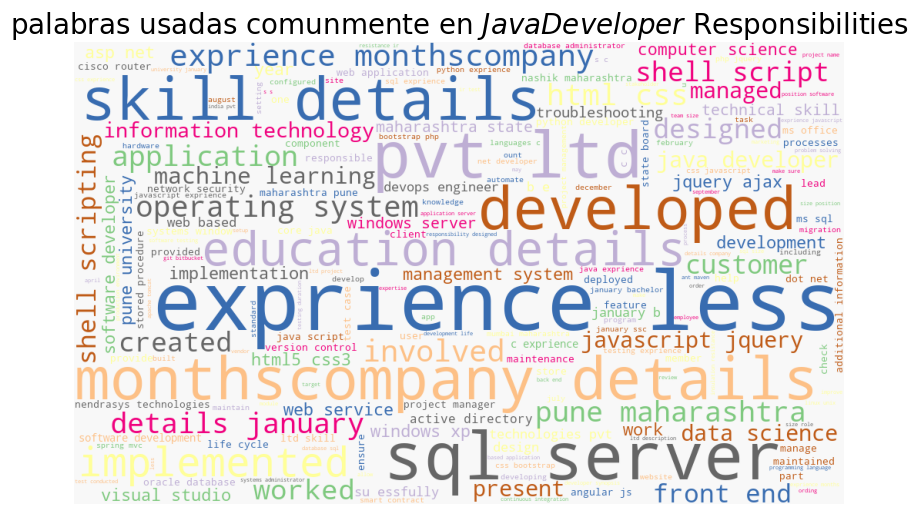

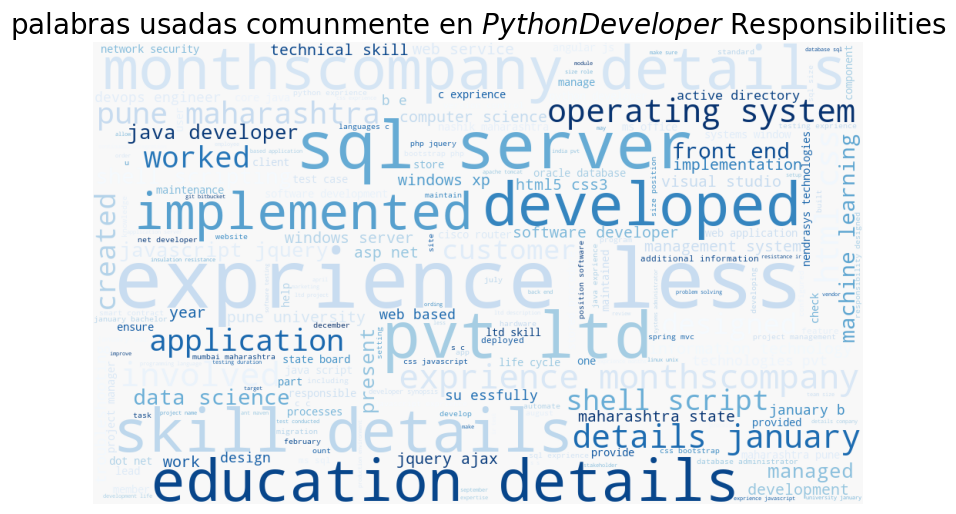

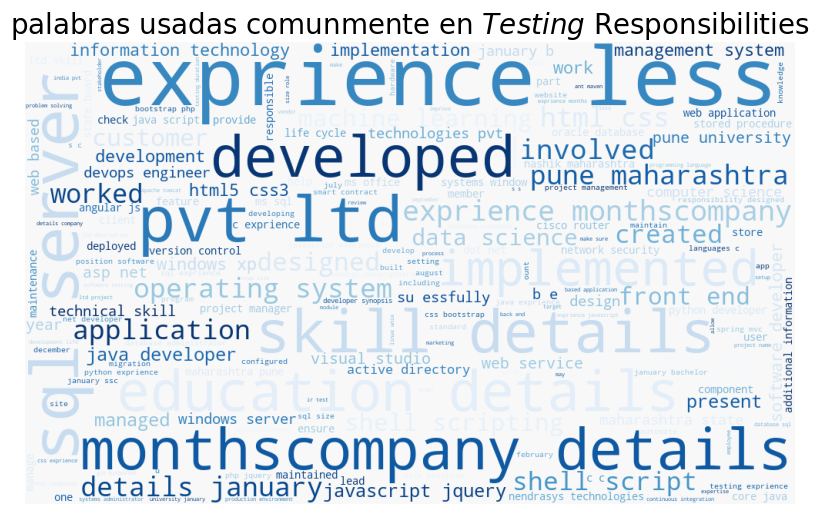

In [ ]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$", size=20)
    plt.show()

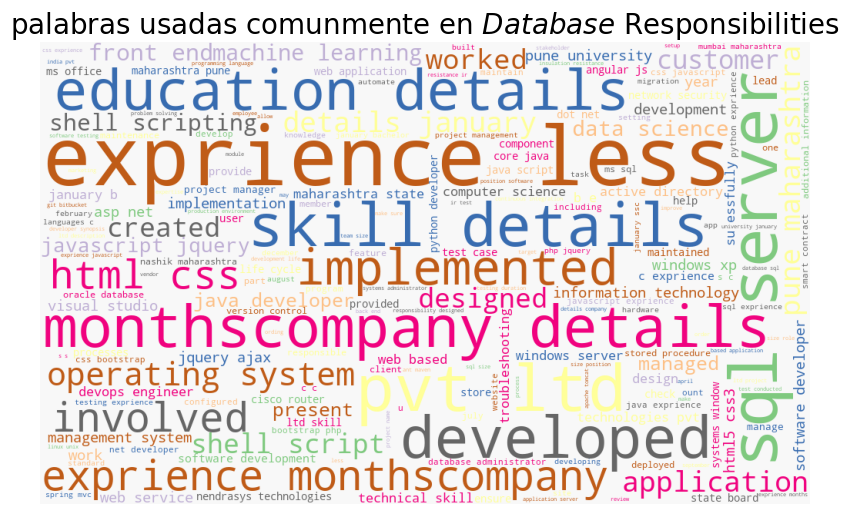

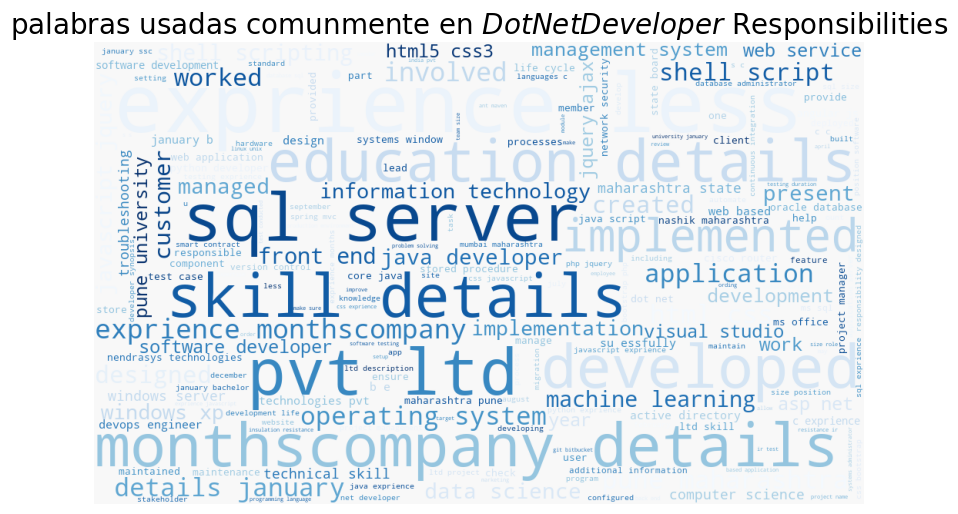

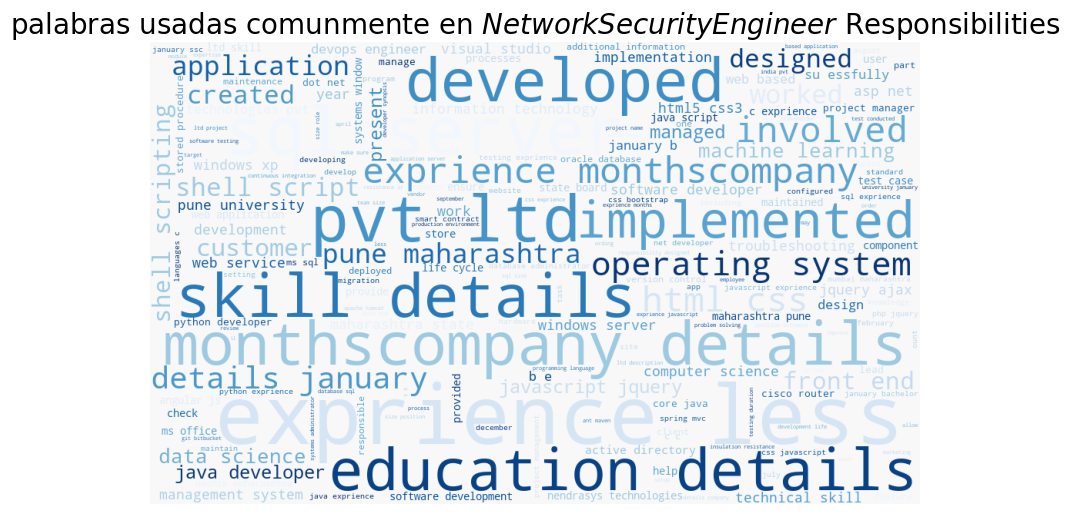

In [ ]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Responsibilities", size=20)
    plt.show()
    

In [ ]:
df.to_csv("archivo_filtrado.csv", index=False)

df

Category  \
0   Network Security Engineer   
1            dotnet Developer   
2   Network Security Engineer   
3            dotnet Developer   
4   Network Security Engineer   
..                        ...   
95           dotnet Developer   
96  Network Security Engineer   
97           dotnet Developer   
98  Network Security Engineer   
99           dotnet Developer   

                                               Resume  \
0   Experienced Network Security Engineer with a d...   
1   Proven dotnet Developer with a solid foundatio...   
2   Experienced Network Security Engineer with a d...   
3   Proven dotnet Developer with a solid foundatio...   
4   Experienced Network Security Engineer with a d...   
..                                                ...   
95  Proven dotnet Developer with a solid foundatio...   
96  Experienced Network Security Engineer with a d...   
97  Proven dotnet Developer with a solid foundatio...   
98  Experienced Network Security Engineer with a d...   
99  Proven dotnet Developer with a solid foundatio...   

                                        Common Skills  length Resume  \
0   Firewall Management, Intrusion Detection, Vuln...            450   
1   C#, ASP.NET, .NET Framework, SQL Server, RESTf...            347   
2   Firewall Management, Intrusion Detection, Vuln...            412   
3   C#, ASP.NET, .NET Framework, SQL Server, RESTf...            335   
4   Firewall Management, Intrusion Detection, Vuln...            433   
..                                                ...            ...   
95  C#, ASP.NET, .NET Framework, SQL Server, RESTf...            346   
96  Firewall Management, Intrusion Detection, Vuln...            444   
97  C#, ASP.NET, .NET Framework, SQL Server, RESTf...            321   
98  Firewall Management, Intrusion Detection, Vuln...            397   
99  C#, ASP.NET, .NET Framework, SQL Server, RESTf...            346   

    length Skills  
0             103  
1              78  
2             103  
3              78  
4             103  
..            ...  
95             78  
96            103  
97             78  
98            103  
99             78  

[100 rows x 5 columns]